# DDT QCD veto based on Autoencoder

In [1]:
import h5py
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
plt.style.use('sonic.mplstyle')

In [3]:
# read the sideband dataset
#fileIN = h5py.File("../data/vae_eP/QCD_deltaEtaLt1.4_results.h5")
#rangeloss = (0., 10.)
fileIN = h5py.File("../data/vae_g/backgr_results.h5")
rangeloss = (0., 1.)

In [4]:
list(fileIN.keys())

['labels', 'results']

In [5]:
labels = fileIN.get("labels")
print(labels[:])

[b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ' b'j1Loss' b'j2Loss']


In [6]:
data = np.array(fileIN.get("results"))
print(data.shape)

(979589, 13)


In [7]:
# apply the dijet mass cut
highMjj = data[:,0] > 700.
data = data[highMjj,:]
print(data.shape)

(471448, 13)


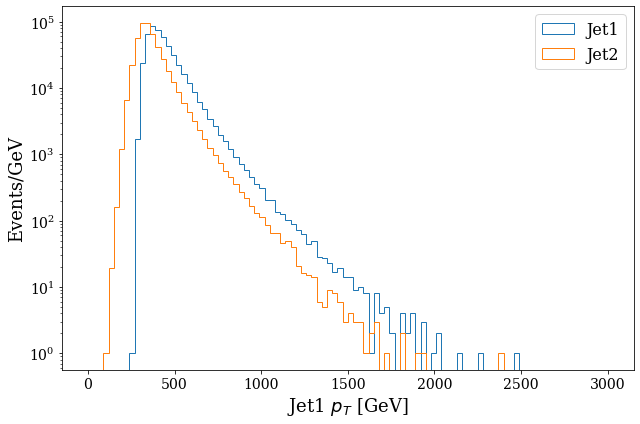

In [8]:
plt.figure(figsize=(9, 6))
plt.hist(data[:,1], range=(0.,3000.), bins=100, histtype='step', label = "Jet1")
plt.hist(data[:,6], range=(0.,3000.), bins=100, histtype='step', label = "Jet2")
plt.semilogy()
plt.xlabel("Jet1 $p_T$ [GeV]")
plt.ylabel("Events/GeV")
plt.legend()
plt.show()

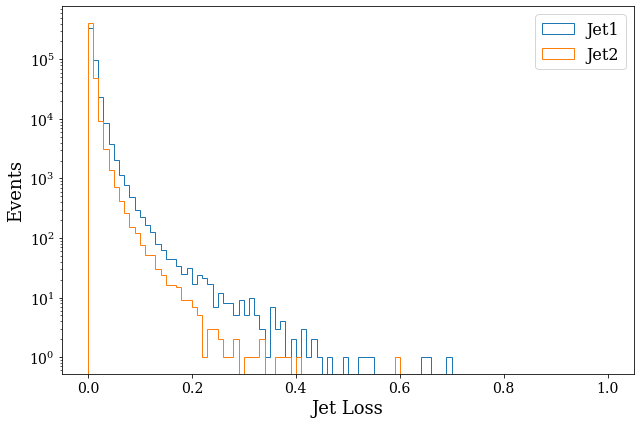

In [9]:
plt.figure(figsize=(9, 6))
plt.hist(data[:,-2], range=rangeloss, bins=100, histtype='step', label = "Jet1")
plt.hist(data[:,-1], range=rangeloss, bins=100, histtype='step', label = "Jet2")
plt.semilogy()
plt.xlabel("Jet Loss")
plt.ylabel("Events")
plt.legend()
plt.show()

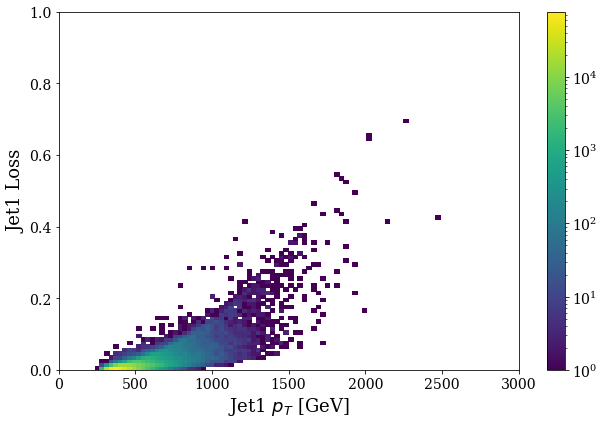

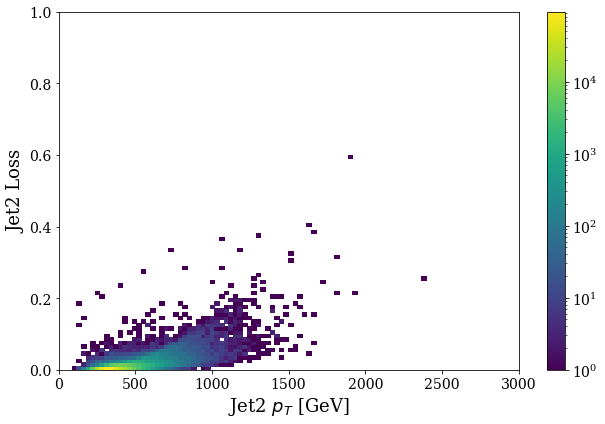

In [10]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,1], data[:,-2],range=((0.,3000.,),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $p_T$ [GeV]")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,6], data[:,-1],range=((0.,3000.,),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss")
plt.xlabel("Jet2 $p_T$ [GeV]")
plt.colorbar()
plt.draw()

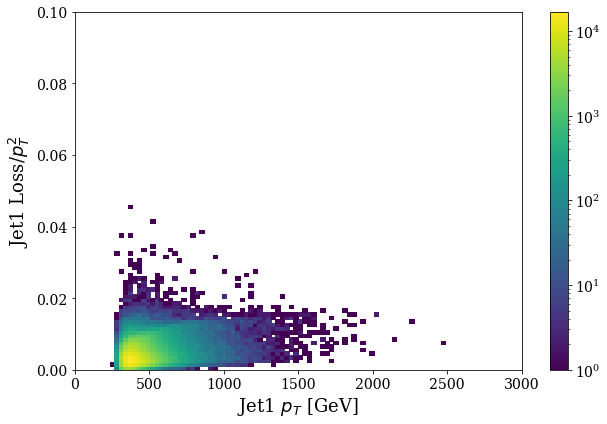

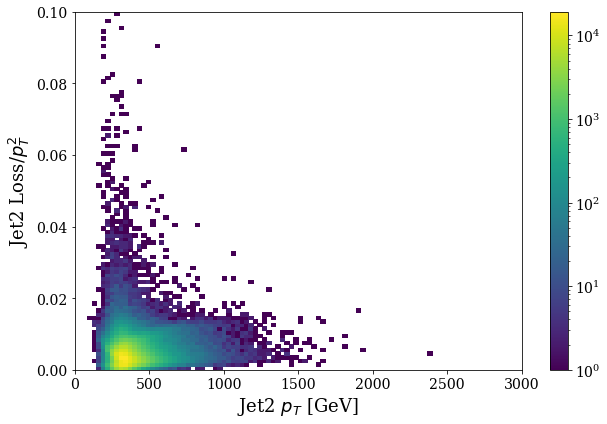

In [47]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,1], data[:,-2]/data[:,1]/data[:,1]*100000.,range=((0.,3000.,),(0.,0.1)), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss/$p_T^2$")
plt.xlabel("Jet1 $p_T$ [GeV]")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,6], data[:,-1]/data[:,6]/data[:,6]*100000.,range=((0.,3000.,),(0.,0.1)), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss/$p_T^2$")
plt.xlabel("Jet2 $p_T$ [GeV]")
plt.colorbar()
plt.draw()

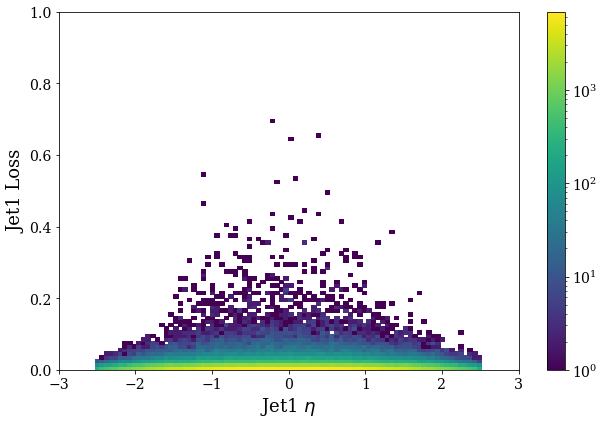

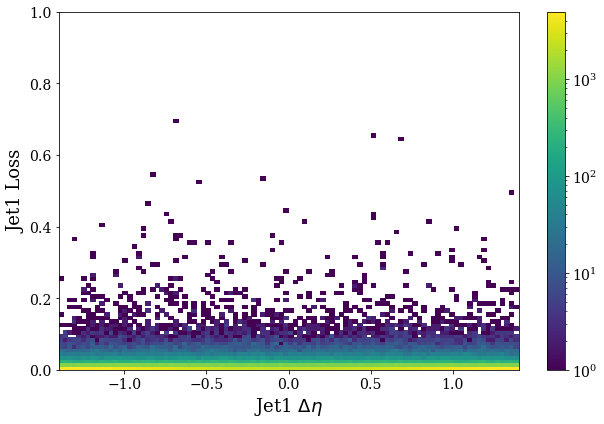

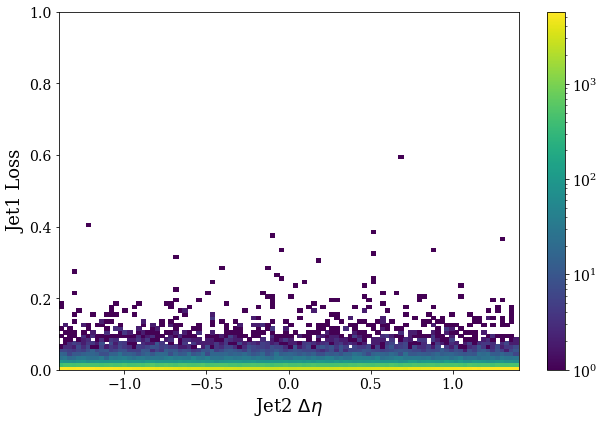

In [11]:
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,2], data[:,-2],range=((-3.,3.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $\eta$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,9], data[:,-2],range=((-1.4,1.4),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $\Delta\eta$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,9], data[:,-1],range=((-1.4,1.4),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet2 $\Delta\eta$")
plt.colorbar()
plt.draw()

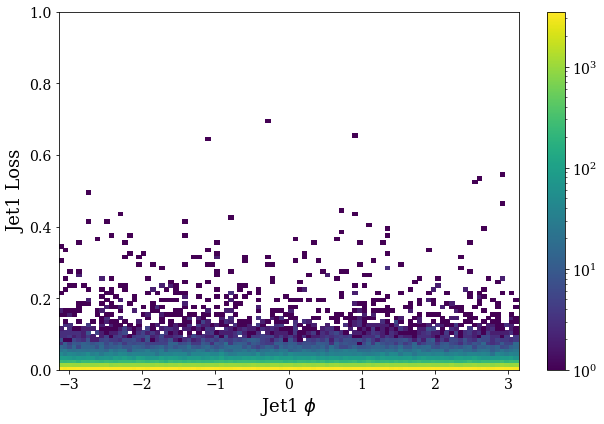

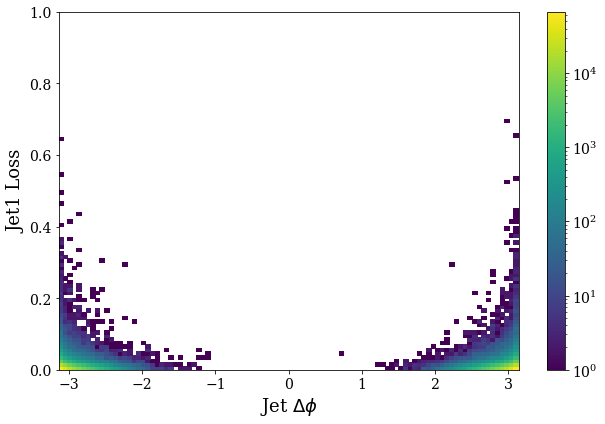

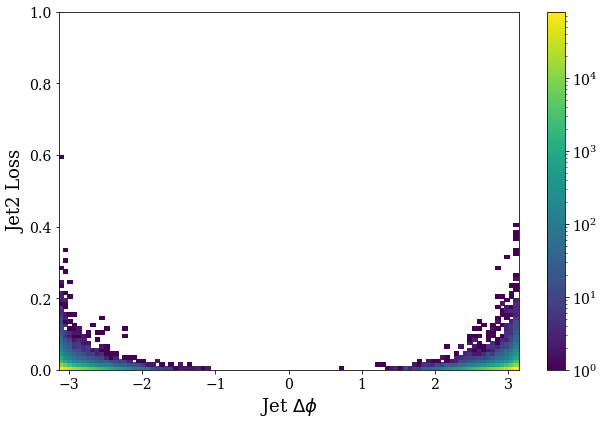

In [12]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,3], data[:,-2],range=((-3.142,3.142),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $\phi$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,10], data[:,-2],range=((-3.142,3.142),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet $\Delta\phi$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,10], data[:,-1],range=((-3.142,3.142),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss")
plt.xlabel("Jet $\Delta\phi$")
plt.colorbar()
plt.draw()

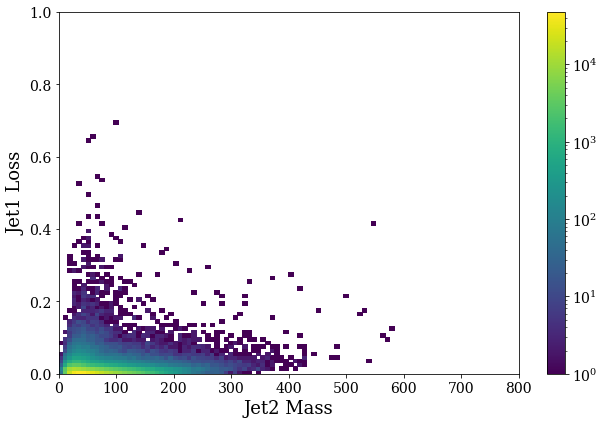

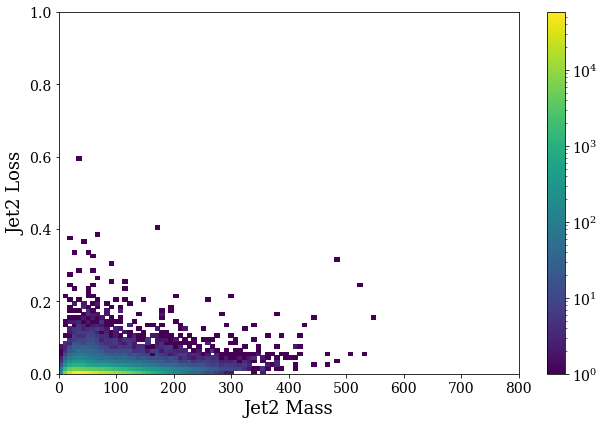

In [13]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,4], data[:,-2],range=((0.,800.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet2 Mass")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,7], data[:,-1],range=((0.,800.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss")
plt.xlabel("Jet2 Mass")
plt.colorbar()
plt.draw()

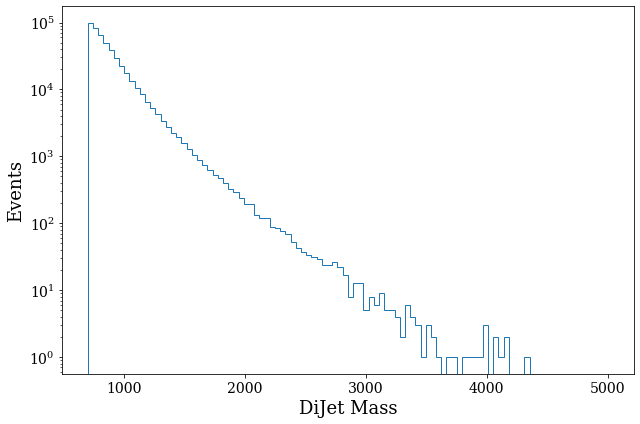

In [14]:
plt.figure(figsize=(9, 6))
plt.hist(data[:,0], range=(700.,5000.), bins=100, histtype='step')
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.show()

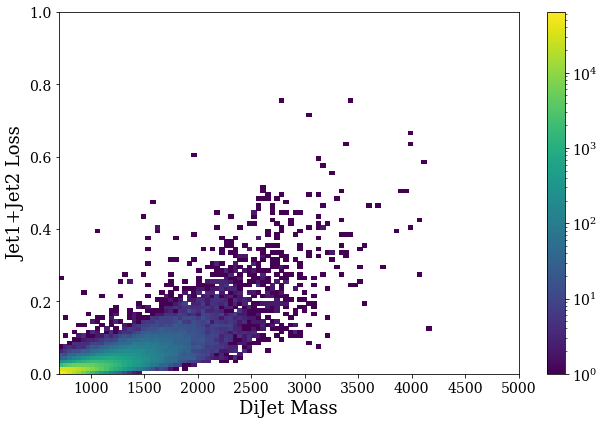

In [15]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,0], data[:,-2]+data[:,-1],range=((700.,5000.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1+Jet2 Loss")
plt.xlabel("DiJet Mass")
plt.colorbar()
plt.draw()

In [62]:
# quantile regression
from sklearn.ensemble import GradientBoostingRegressor
x = np.reshape(data[:,0], (-1,1))
y = data[:,-1]+data[:,-2]
print(x.shape,y.shape)
alpha = 0.99
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(x, y)

(471448, 1) (471448,)


GradientBoostingRegressor(alpha=0.99, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='quantile', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

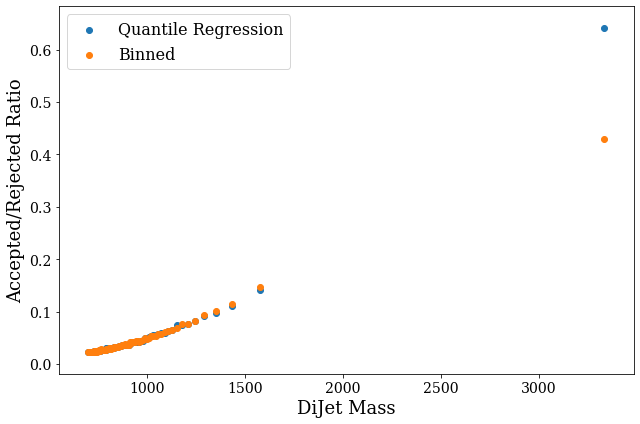

In [64]:
plt.figure(figsize=(9, 6))
plt.scatter(mjjBinCenter, clf.predict(np.reshape(mjjBinCenter, (-1,1))), label="Quantile Regression")
plt.scatter(mjjBinCenter, lossCut, label="Binned")
plt.xlabel("DiJet Mass")
plt.ylabel("Threshold")
plt.legend()
plt.show()

In [25]:
# separate the sample in iBin bins with comparable statistics
mjjVal = data[:,0]
mjjVal = np.sort(mjjVal)
iBin = 100
binStat = int(len(mjjVal)/iBin)
mjjBins = []
for i in range(iBin+1):
    mjjBins.append(int(mjjVal[i*binStat]))
mjjBins[-1] = max(mjjBins[-1], 5000.)
mjjBinMin = mjjBins[:-1]
mjjBinMax = mjjBins[1:]
print(mjjBinMin)
print(mjjBinMax)

[700, 701, 703, 705, 707, 709, 711, 713, 715, 717, 719, 721, 724, 726, 728, 730, 732, 734, 736, 739, 741, 743, 745, 748, 750, 752, 754, 757, 759, 762, 764, 767, 769, 772, 774, 777, 780, 782, 785, 788, 791, 794, 796, 799, 802, 805, 809, 812, 815, 818, 822, 825, 829, 832, 836, 840, 843, 847, 852, 856, 860, 864, 869, 873, 878, 883, 888, 893, 899, 904, 910, 916, 922, 929, 936, 943, 950, 958, 966, 975, 984, 994, 1004, 1015, 1026, 1038, 1052, 1066, 1082, 1100, 1119, 1141, 1165, 1194, 1228, 1268, 1318, 1387, 1485, 1668]
[701, 703, 705, 707, 709, 711, 713, 715, 717, 719, 721, 724, 726, 728, 730, 732, 734, 736, 739, 741, 743, 745, 748, 750, 752, 754, 757, 759, 762, 764, 767, 769, 772, 774, 777, 780, 782, 785, 788, 791, 794, 796, 799, 802, 805, 809, 812, 815, 818, 822, 825, 829, 832, 836, 840, 843, 847, 852, 856, 860, 864, 869, 873, 878, 883, 888, 893, 899, 904, 910, 916, 922, 929, 936, 943, 950, 958, 966, 975, 984, 994, 1004, 1015, 1026, 1038, 1052, 1066, 1082, 1100, 1119, 1141, 1165, 1194, 122

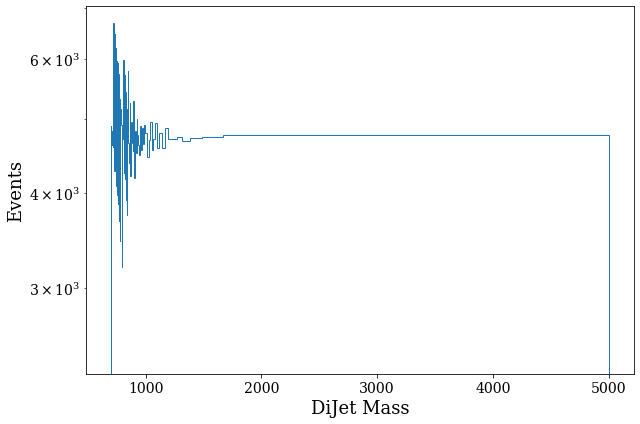

In [26]:
# Verify that the number of events/bin is reasonably flat
plt.figure(figsize=(9, 6))
plt.hist(data[:,0], range=(700.,5000.), bins=mjjBins, histtype='step', density=False)
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.show()

In [27]:
# in each bin, look for the (loss1+loss2) corresponding to a 1E-3 percentile
FPR = 0.01
lossCut = []
for i in range(len(mjjBinMin)):
    minMjj = mjjBinMin[i]
    maxMjj = mjjBinMax[i]
    myMask = (data[:,0]>=minMjj)*(data[:,0]<maxMjj)
    dataBin = data[myMask,:]
    loss = np.sort(dataBin[:,-1]+dataBin[:,-2])
    percentile = int(len(loss)*FPR)
    print(percentile,dataBin.shape)
    print(loss[-percentile],loss[-percentile-1])
    lossCut.append(loss[-percentile])
lossCut = np.array(lossCut)
print(lossCut)

24 (2434, 13)
0.023016626673899185 0.0218314666932423
49 (4902, 13)
0.022850522480256083 0.02274650531976255
48 (4818, 13)
0.022528897033695833 0.022503391770106705
47 (4783, 13)
0.023249644140356737 0.023098187236130496
47 (4776, 13)
0.022440446378883858 0.022416843226734446
48 (4832, 13)
0.023708370278555158 0.02369407065645987
46 (4628, 13)
0.022278869458640913 0.02206043621268066
46 (4683, 13)
0.023259069477025912 0.023229418291770637
46 (4602, 13)
0.02305458657634451 0.022984924229861498
46 (4661, 13)
0.022644132569301527 0.022613185807369793
46 (4617, 13)
0.022816677291102344 0.022677104928466647
66 (6689, 13)
0.023406862934026537 0.023262702469650256
45 (4533, 13)
0.0236410691493145 0.023515598186969695
44 (4484, 13)
0.023445040391496925 0.023324739685734185
43 (4341, 13)
0.022853661936894205 0.022815274251521654
42 (4271, 13)
0.02420124211938732 0.02409781737941081
43 (4371, 13)
0.024951424865068954 0.02477870777634887
44 (4409, 13)
0.02348369062341975 0.02328645912526244
64 (6

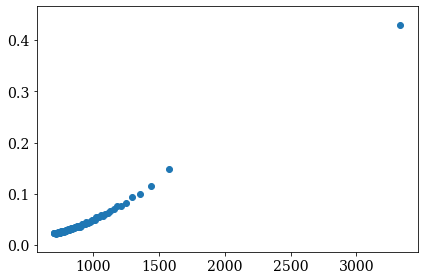

In [28]:
# plot the threshold value vs bin center
mjjBinCenter = (np.array(mjjBinMin)+np.array(mjjBinMax))/2
plt.scatter(mjjBinCenter, lossCut)

In [29]:
# use  np.interp  to define the threshold(mJJ) function
mJJval = 1500.
print(np.interp(mJJval,mjjBinCenter,lossCut))

0.13012236384056494


In [56]:
# Define the accept (anomalies) and reject (standard QCD) datasets
# ON THE QCD SIGNAL DATASET [NOT YET AVAILABLE, SO WE USE THE SAME HERE]
mJJval = np.array(data[:,0])
loss = data[:,-1]+data[:,-2]
threshold = np.interp(mJJval, mjjBinCenter,lossCut)

In [31]:
mJJ_QCD_pass = mJJval[loss>=threshold]
mJJ_QCD_reject = mJJval[loss<threshold]

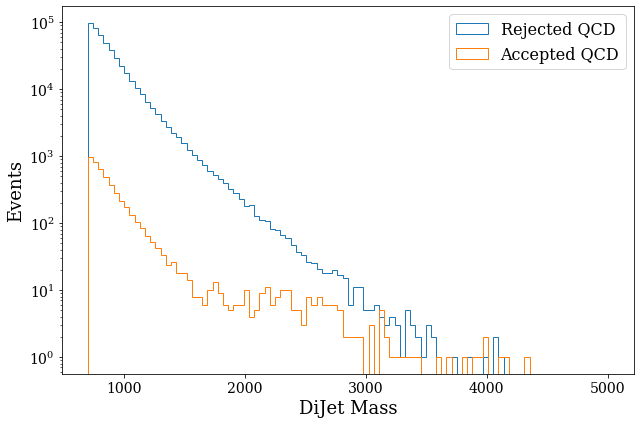

In [32]:
plt.figure(figsize=(9, 6))
plt.hist(mJJ_QCD_reject, range=(700.,5000.), bins=100, histtype='step', label="Rejected QCD")
plt.hist(mJJ_QCD_pass, range=(700.,5000.), bins=100, histtype='step', label="Accepted QCD")
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.legend()
plt.show()

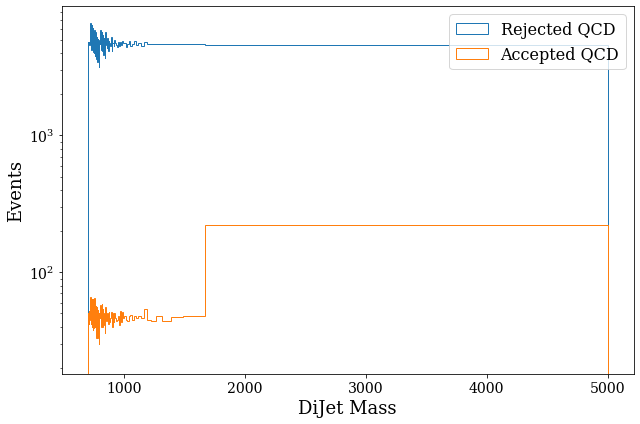

In [38]:
plt.figure(figsize=(9, 6))
plt.hist(mJJ_QCD_reject, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Rejected QCD")
plt.hist(mJJ_QCD_pass, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Accepted QCD")
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.legend()
plt.show()

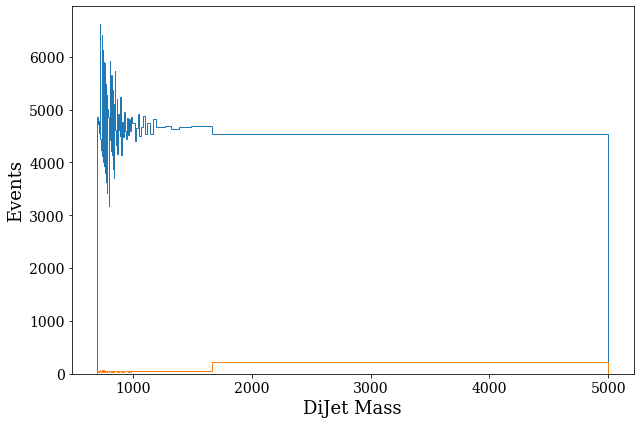

In [33]:
plt.figure(figsize=(9, 6))
rejected = plt.hist(mJJ_QCD_reject, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Rejected QCD")
accepted = plt.hist(mJJ_QCD_pass, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Accepted QCD")
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.show()

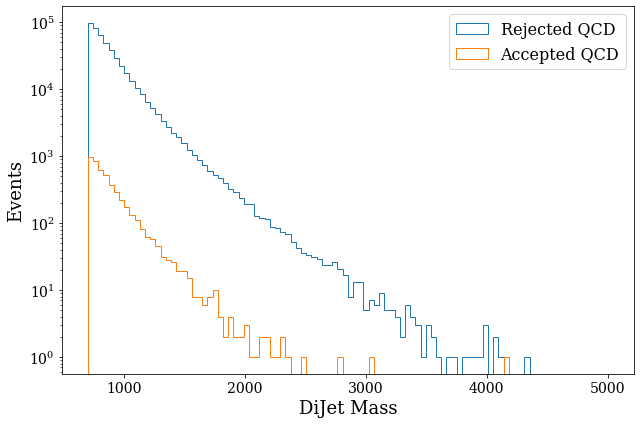

In [65]:
threshold_BDT = clf.predict(np.reshape(mJJval, (-1,1)))
mJJ_QCD_pass_BDT = mJJval[loss>=threshold_BDT]
mJJ_QCD_reject_BDT = mJJval[loss<threshold_BDT]
plt.figure(figsize=(9, 6))
plt.hist(mJJ_QCD_reject_BDT, range=(700.,5000.), bins=100, histtype='step', label="Rejected QCD")
plt.hist(mJJ_QCD_pass_BDT, range=(700.,5000.), bins=100, histtype='step', label="Accepted QCD")
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.legend()
plt.show()

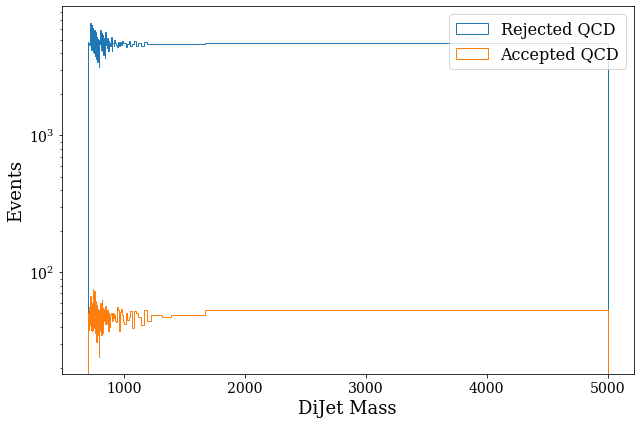

In [66]:
plt.figure(figsize=(9, 6))
plt.hist(mJJ_QCD_reject_BDT, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Rejected QCD")
plt.hist(mJJ_QCD_pass_BDT, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Accepted QCD")
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.legend()
plt.show()

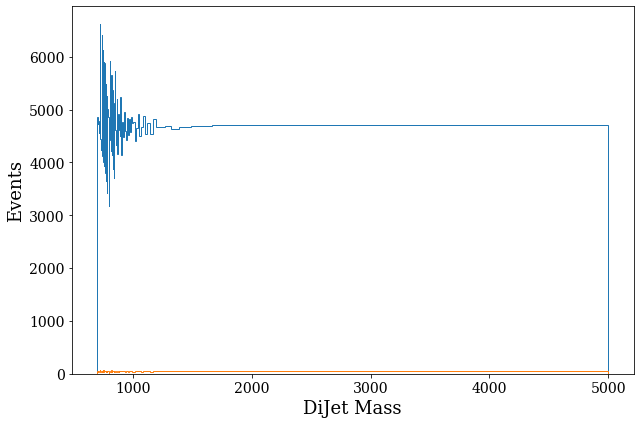

In [67]:
plt.figure(figsize=(9, 6))
rejected = plt.hist(mJJ_QCD_reject_BDT, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Rejected QCD")
accepted = plt.hist(mJJ_QCD_pass_BDT, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Accepted QCD")
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.show()